In [1]:
import sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## The Titanic dataset

Source: https://www.kaggle.com/francksylla/titanic-machine-learning-from-disaster

In [2]:
titanic_df = pd.read_csv('datasets/titanic_train.csv')
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Exploratory Data Analysis

In [3]:
titanic_df.shape

(891, 12)

In [4]:
titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], 'columns', inplace=True)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [5]:
titanic_df[titanic_df.isnull().any(axis=1)].count()

Survived    179
Pclass      179
Sex         179
Age           2
SibSp       179
Parch       179
Fare        179
Embarked    177
dtype: int64

In [6]:
titanic_df = titanic_df.dropna()

In [7]:
titanic_df.shape

(712, 8)

In [8]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


### Visualizing relationships

Text(0, 0.5, 'Survived')

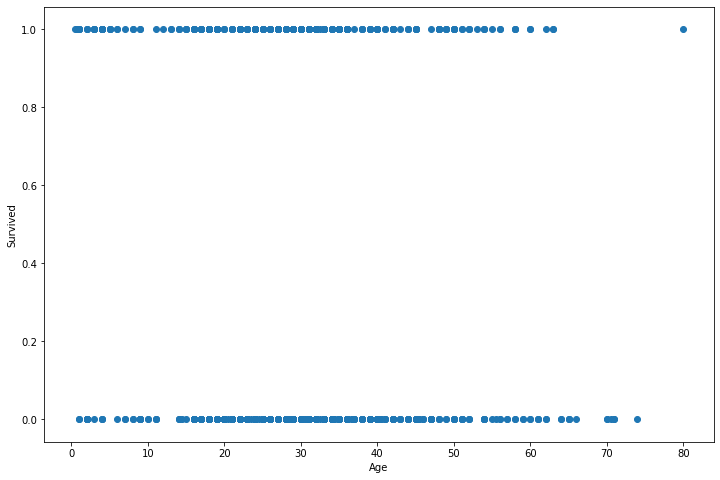

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(titanic_df['Age'], titanic_df['Survived'])

plt.xlabel('Age')
plt.ylabel('Survived')

Text(0, 0.5, 'Survived')

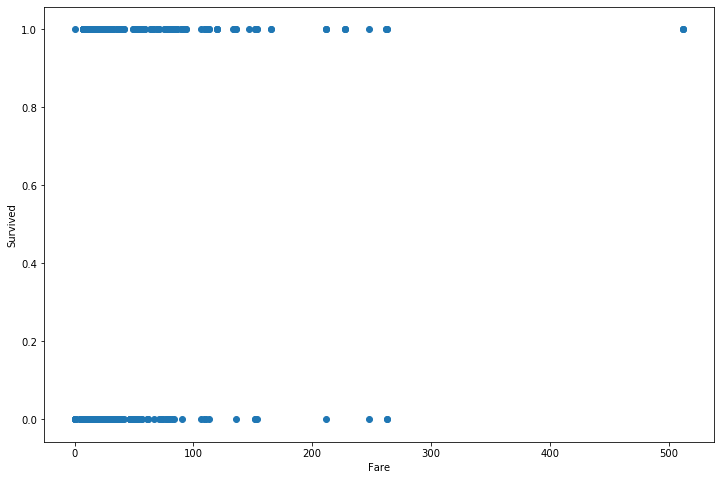

In [10]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(titanic_df['Fare'], titanic_df['Survived'])

plt.xlabel('Fare')
plt.ylabel('Survived')

In [11]:
pd.crosstab(titanic_df['Sex'], titanic_df['Survived'])

Survived,0,1
Sex,,
female,64,195
male,360,93


In [12]:
pd.crosstab(titanic_df['Pclass'], titanic_df['Survived'])

Survived,0,1
Pclass,,
1,64,120
2,90,83
3,270,85


In [13]:
titanic_data_corr = titanic_df.corr()

titanic_data_corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


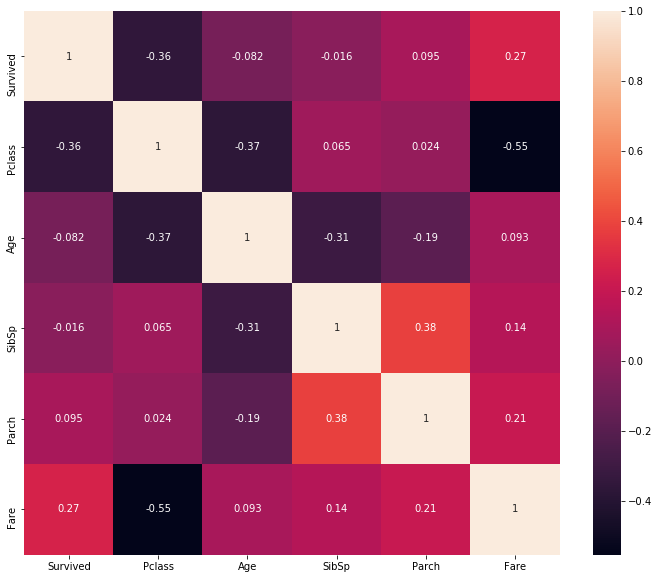

In [14]:
fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(titanic_data_corr, annot=True)

### Data Wrangling

In [15]:
from sklearn import preprocessing

label_encoding = preprocessing.LabelEncoder()
titanic_df['Sex'] = label_encoding.fit_transform(titanic_df['Sex'].astype(str))

titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [16]:
label_encoding.classes_

array(['female', 'male'], dtype=object)

#### C = Cherbourg,  Q = Queenstown,  S = Southampton

In [17]:
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'])

titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [18]:
titanic_df = titanic_df.sample(frac=1).reset_index(drop=True)

titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,2,0,24.0,0,0,13.000,0,0,1
1,1,2,0,24.0,0,2,14.500,0,0,1
2,0,1,1,31.0,1,0,52.000,0,0,1
3,0,3,1,28.0,1,0,15.850,0,0,1
4,0,3,0,21.0,2,2,34.375,0,0,1


### Binary Classification Logistic Regression

In [19]:
from sklearn.model_selection import train_test_split

X = titanic_df.drop('Survived', axis=1)
Y = titanic_df['Survived']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [20]:
x_train.shape, y_train.shape

((569, 9), (569,))

In [21]:
x_test.shape, y_test.shape

((143, 9), (143,))

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [22]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
logistic_model.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [23]:
y_pred = logistic_model.predict(x_test)

In [24]:
pred_results = pd.DataFrame({'y_test': y_test,'y_pred': y_pred})
pred_results.head()

,y_test,y_pred
546,0,0
563,1,1
168,0,0
212,1,0
87,1,0


In [25]:
# Confusion matrix

titanic_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)
titanic_crosstab

y_test,0,1
y_pred,,
0,74,14
1,14,41


In [26]:
TP = titanic_crosstab[1][1]
TN = titanic_crosstab[0][0]
FP = titanic_crosstab[0][1]
FN = titanic_crosstab[1][0]

In [27]:
accuracy_score_verified = (TP + TN) / (TP + FP + TN + FN)
accuracy_score_verified

0.8041958041958042

In [28]:
precision_score_survived = TP / (TP + FP)
precision_score_survived

0.7454545454545455

In [29]:
recall_score_survived = TP / (TP + FN)
recall_score_survived

0.7454545454545455

For computing Precision-recall score, we need to specify an averaging method to determine how the precision and recall scores for different labels should be weighted

* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [31]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("accuracy_score : ", acc)
print("precision_score : ", prec)
print("recall_score : ", recall)

accuracy_score :  0.8041958041958042
precision_score :  0.7454545454545455
recall_score :  0.7454545454545455


### Multiple Classification Models

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from IPython.display import display

In [33]:
FEATURES = list(titanic_df.columns[1:])
FEATURES

['Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

In [34]:
# To store results of various Classifiers
result_dict = {}

In [35]:
def summarize_classification(y_test, y_pred):
    
    acc = accuracy_score(y_test, y_pred, normalize=True)
    num_acc = accuracy_score(y_test, y_pred, normalize=False)

    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    return {'accuracy': acc, 
            'precision': prec,
            'recall':recall, 
            'accuracy_count':num_acc}

In [36]:
def build_model(classifier_fn, name_of_y_col, names_of_x_cols, dataset, test_frac=0.2):
    
    print('Classification: ', classifier_fn)
    
    X = dataset[names_of_x_cols]
    Y = dataset[name_of_y_col]

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_frac)
       
    model = classifier_fn.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)

    y_pred_train = model.predict(x_train)
    
    pred_results = pd.DataFrame({'y_test': y_test,
                                 'y_pred': y_pred})
    
    model_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)
    print('\nConfusion_matrix:')
    display(model_crosstab)

    train_summary = summarize_classification(y_train, y_pred_train)
    print('\nTraining data',train_summary)
    
    test_summary = summarize_classification(y_test, y_pred)
    print('\nTesting data',test_summary)
    
    return {'training': train_summary, 
            'test': test_summary,
            'confusion_matrix': model_crosstab}

In [37]:
result_dict['logistic'] = build_model(LogisticRegression(solver='liblinear'),
                                      'Survived',FEATURES,titanic_df)

Classification:  LogisticRegression(solver='liblinear')

Confusion_matrix:


y_test,0,1
y_pred,,
0,73,20
1,10,40



Training data {'accuracy': 0.8066783831282952, 'precision': 0.795, 'recall': 0.6973684210526315, 'accuracy_count': 459}

Testing data {'accuracy': 0.7902097902097902, 'precision': 0.8, 'recall': 0.6666666666666666, 'accuracy_count': 113}


In [38]:
result_dict['linear_discriminant'] = build_model(LinearDiscriminantAnalysis(solver='svd'),
                                                 'Survived',FEATURES,titanic_df)

Classification:  LinearDiscriminantAnalysis()

Confusion_matrix:


y_test,0,1
y_pred,,
0,76,11
1,14,42



Training data {'accuracy': 0.789103690685413, 'precision': 0.7674418604651163, 'recall': 0.7021276595744681, 'accuracy_count': 449}

Testing data {'accuracy': 0.8251748251748252, 'precision': 0.75, 'recall': 0.7924528301886793, 'accuracy_count': 118}


In [39]:
result_dict['quadratic_discriminant'] = build_model(QuadraticDiscriminantAnalysis(),
                                                    'Survived',FEATURES,titanic_df)

Classification:  QuadraticDiscriminantAnalysis()

Confusion_matrix:


c:\users\shaur\appdata\local\programs\python\python37\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


y_test,0,1
y_pred,,
0,12,6
1,71,54



Training data {'accuracy': 0.5061511423550088, 'precision': 0.4460285132382892, 'recall': 0.9605263157894737, 'accuracy_count': 288}

Testing data {'accuracy': 0.46153846153846156, 'precision': 0.432, 'recall': 0.9, 'accuracy_count': 66}


In [40]:
result_dict['sgd'] = build_model(SGDClassifier(max_iter=1000, tol=1e-3),
                                 'Survived',FEATURES,titanic_df)

Classification:  SGDClassifier()

Confusion_matrix:


y_test,0,1
y_pred,,
0,65,14
1,21,43



Training data {'accuracy': 0.7715289982425307, 'precision': 0.6934865900383141, 'recall': 0.7835497835497836, 'accuracy_count': 439}

Testing data {'accuracy': 0.7552447552447552, 'precision': 0.671875, 'recall': 0.7543859649122807, 'accuracy_count': 108}


In [41]:
# SVC with a linear kernel
# dual=False when number of samples > number of features

result_dict['linear_svc'] = build_model(LinearSVC(C=1.0, max_iter=1000, tol=1e-3, dual=False),
                                        'Survived',FEATURES,titanic_df)

Classification:  LinearSVC(dual=False, tol=0.001)

Confusion_matrix:


y_test,0,1
y_pred,,
0,67,17
1,12,47



Training data {'accuracy': 0.7926186291739895, 'precision': 0.7523809523809524, 'recall': 0.7053571428571429, 'accuracy_count': 451}

Testing data {'accuracy': 0.7972027972027972, 'precision': 0.7966101694915254, 'recall': 0.734375, 'accuracy_count': 114}


In [42]:
result_dict['radius_neighbors'] = build_model(RadiusNeighborsClassifier(radius=40.0),
                                              'Survived',FEATURES,titanic_df)

Classification:  RadiusNeighborsClassifier(radius=40.0)

Confusion_matrix:


y_test,0,1
y_pred,,
0,76,49
1,5,13



Training data {'accuracy': 0.6854130052724078, 'precision': 0.7326732673267327, 'recall': 0.3274336283185841, 'accuracy_count': 390}

Testing data {'accuracy': 0.6223776223776224, 'precision': 0.7222222222222222, 'recall': 0.20967741935483872, 'accuracy_count': 89}


In [43]:
# max_depth = None, then nodes are expanded until all leaves are pure
# or until all leaves contain less than min_samples_split samples

# max_features = None -- (then max_features=n_features), auto -- (then max_features=sqrt(n_features)), 
#               sqrt -- (then max_features=sqrt(n_features)), log2 -- (then max_features=log2(n_features))

result_dict['decision_tree'] = build_model(DecisionTreeClassifier(max_depth=None, max_features=None),
                                           'Survived',FEATURES,titanic_df)

Classification:  DecisionTreeClassifier()

Confusion_matrix:


y_test,0,1
y_pred,,
0,71,17
1,17,38



Training data {'accuracy': 0.9859402460456942, 'precision': 1.0, 'recall': 0.9656652360515021, 'accuracy_count': 561}

Testing data {'accuracy': 0.7622377622377622, 'precision': 0.6909090909090909, 'recall': 0.6909090909090909, 'accuracy_count': 109}


In [44]:
result_dict['naive_bayes'] = build_model(GaussianNB(priors=None),
                                        'Survived',FEATURES,titanic_df)

Classification:  GaussianNB()

Confusion_matrix:


y_test,0,1
y_pred,,
0,73,19
1,15,36



Training data {'accuracy': 0.773286467486819, 'precision': 0.7574257425742574, 'recall': 0.6566523605150214, 'accuracy_count': 440}

Testing data {'accuracy': 0.7622377622377622, 'precision': 0.7058823529411765, 'recall': 0.6545454545454545, 'accuracy_count': 109}


In [45]:
training_result=[]
for key in result_dict:
    training_result.append(pd.DataFrame(result_dict[key]['training'],index=[key]))
    
training_result=pd.concat(training_result)
display(training_result)

,accuracy,precision,recall,accuracy_count
logistic,0.806678,0.795000,0.697368,459
linear_discriminant,0.789104,0.767442,0.702128,449
quadratic_discriminant,0.506151,0.446029,0.960526,288
sgd,0.771529,0.693487,0.783550,439
linear_svc,0.792619,0.752381,0.705357,451
radius_neighbors,0.685413,0.732673,0.327434,390
decision_tree,0.985940,1.000000,0.965665,561
naive_bayes,0.773286,0.757426,0.656652,440


In [46]:
testing_result=[]
for key in result_dict:
    testing_result.append(pd.DataFrame(result_dict[key]['test'],index=[key]))
    
testing_result=pd.concat(testing_result)
display(testing_result)

,accuracy,precision,recall,accuracy_count
logistic,0.790210,0.800000,0.666667,113
linear_discriminant,0.825175,0.750000,0.792453,118
quadratic_discriminant,0.461538,0.432000,0.900000,66
sgd,0.755245,0.671875,0.754386,108
linear_svc,0.797203,0.796610,0.734375,114
radius_neighbors,0.622378,0.722222,0.209677,89
decision_tree,0.762238,0.690909,0.690909,109
naive_bayes,0.762238,0.705882,0.654545,109


### Hyperparameter Tuning With GridSearch

#### GridSearchCV on DecisionTreeClassifier

In [47]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [2, 4, 5, 7, 9, 10]}

grid_search = GridSearchCV(DecisionTreeClassifier(), parameters, cv=3, return_train_score=True)
grid_search.fit(x_train, y_train)

grid_search.best_params_

{'max_depth': 7}

In [48]:
grid_results=pd.DataFrame(list(zip(grid_search.cv_results_['params'],grid_search.cv_results_['mean_test_score'],grid_search.cv_results_['rank_test_score'])),columns=['Params','Mean_test_score','Rank_test_score'])
grid_results.set_index('Rank_test_score',inplace=True)
grid_results.sort_index()

,Params,Mean_test_score
Rank_test_score,,
1,{'max_depth': 7},0.780358
2,{'max_depth': 5},0.778595
3,{'max_depth': 2},0.773285
4,{'max_depth': 4},0.771596
5,{'max_depth': 9},0.743470
6,{'max_depth': 10},0.738169


In [49]:
decision_tree_model = DecisionTreeClassifier(max_depth = grid_search.best_params_['max_depth'])
decision_tree_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [50]:
y_pred = decision_tree_model.predict(x_test)

In [51]:
summarize_classification(y_test, y_pred)

{'accuracy': 0.7972027972027972,
 'accuracy_count': 114,
 'precision': 0.75,
 'recall': 0.7090909090909091}

#### GridSearchCV on LogisticRegression

In [52]:
parameters = {'penalty': ['l1', 'l2'], 
              'C': [0.1, 0.4, 0.8, 1, 2, 5]}

grid_search = GridSearchCV(LogisticRegression(solver='liblinear'), parameters, cv=3, return_train_score=True)
grid_search.fit(x_train, y_train)

grid_search.best_params_

{'C': 5, 'penalty': 'l1'}

In [53]:
grid_results=pd.DataFrame(list(zip(grid_search.cv_results_['params'],grid_search.cv_results_['mean_test_score'],grid_search.cv_results_['rank_test_score'])),columns=['Params','Mean_test_score','Rank_test_score'])
grid_results.set_index('Rank_test_score',inplace=True)
grid_results.sort_index()

,Params,Mean_test_score
Rank_test_score,,
1,"{'C': 5, 'penalty': 'l1'}",0.797921
2,"{'C': 2, 'penalty': 'l1'}",0.796176
3,"{'C': 5, 'penalty': 'l2'}",0.796166
4,"{'C': 2, 'penalty': 'l2'}",0.790894
5,"{'C': 1, 'penalty': 'l1'}",0.790885
6,"{'C': 0.8, 'penalty': 'l1'}",0.787367
7,"{'C': 0.8, 'penalty': 'l2'}",0.778576
8,"{'C': 1, 'penalty': 'l2'}",0.776822
9,"{'C': 0.1, 'penalty': 'l2'}",0.775058


In [54]:
logistic_model = LogisticRegression(solver='liblinear', penalty=grid_search.best_params_['penalty'], 
                                    C=grid_search.best_params_['C'])
logistic_model.fit(x_train, y_train)

LogisticRegression(C=5, penalty='l1', solver='liblinear')

In [55]:
y_pred = logistic_model.predict(x_test)

In [56]:
summarize_classification(y_test, y_pred)

{'accuracy': 0.8111888111888111,
 'accuracy_count': 116,
 'precision': 0.75,
 'recall': 0.7636363636363637}